# **PROYECTO: <i>Predicción de Deserción de estudiantes universitarios</i>**
## **CURSO: <i>Métodos Numéricos y Optimización para Machine Learning</i>**

## **Integrantes:**
<ul>
    <li>Aybar Escobar Edithson Ricardo</li>
    <li>Llanos Angeles Leily Marlith</li>
    <li>Mendoza Villar Antony Ivan</li>
    <li>Luque Mamani Magno Ricardo</li>
</ul>

En este notebook, se mostrará en detalle todo el proceso de desarrollo de un modelo de predicción de deserción de estudiantes universitarios. Esto comprende lo siguiente:


##**Preprocesamiento**

### **Librerias:**

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from scipy.stats import kruskal
from scipy.stats import f_oneway

### **1. Obtención de la data:**

In [211]:
# Definimos la ruta del archivo .csv
ruta = '/content/data.csv'

In [212]:
# Lectura de los cinco primeros registros de la data
df = pd.read_csv(ruta, sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### **2. Verficar datos faltantes y tipo de dato:**

In [213]:
# Ahora verificamos si existen datos faltantes y los tipos de datos con el siguiente método
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Como se puede observar, nuestro marco de datos no presenta datos faltantes. Con respecto a los tipos de datos, en su mayoría son del tipo numérico y solamente uno del tipo object.

### **3. Análisis de los tipos de datos:**

Cabe mencionar que, si bien los tipos de datos son numéricos, algunos de ellos representan valores categóricos nominales.

In [214]:
# Imprimir los nombres de las columnas
print(df.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [215]:
# Seleccionamos aquellas características que representan valores categóricos nominales
categorico_nominal = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification',
                      'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
                      'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
                      'International']

In [216]:
# Seleccionamos aquellas características que representan valores numéricos que no son label-encoding
numerico = ['Application order', 'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
            'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

### **4. Encoding:**

In [217]:
# Para la columna con el tipo de dato object, vamos a verificar los valores únicos
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Se muestra solo tres valores únicos para la columna 'Target'. Y como queremos trabajar con valores numéricos, vamos a aplicar label encoding.

In [218]:
# Conversión de tipo de dato
mapeo_target = {
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
}
df['Target'] = df['Target'].replace(mapeo_target)
df['Target']

<ipython-input-218-d54cc1d089f4>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace(mapeo_target)


,Target
0,0
1,1
2,0
3,1
4,1
...,...
4419,1
4420,0
4421,0
4422,1


### **5. Correlación de nuestra data:**

### 5.1 Correlación entre varibles de tipo categórico nominales:

En primer lugar, vamos a encontrar la correlación entre la columna de interés, denominada 'Target', y las demás columnas de tipo variable categórica nominal.

In [219]:
# Lista de variables categóricas
categorico_nominal

# Agregamos "Target" a la lista
categorico_nominal.append('Target')

# Realizamos la prueba de Chi-cuadrado para cada variable con respecto a "Target"
results = {}

for col in categorico_nominal[:-1]:  # Excluir "Target"
    contingency_table = pd.crosstab(df[col], df['Target'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    results[col] = {'Chi-cuadrado': chi2, 'p-value': p, 'Grados de libertad': dof}

# Creamops un DataFrame para mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Interpretar los resultados
p_value = 0.05
for col, result in results.items():
    if result['p-value'] < p_value:
        print(f"La variable '{col}' tiene una asociación significativa con 'Target'.")
    else:
        print(f"La variable '{col}' no tiene una asociación significativa con 'Target'.")


                              Chi-cuadrado        p-value  Grados de libertad
Marital status                   63.438549   8.054280e-10                10.0
Application mode                466.513683   1.964657e-77                34.0
Course                          558.284474   2.316571e-97                32.0
Daytime/evening attendance\t     28.739937   5.743834e-07                 2.0
Previous qualification          219.680709   7.160305e-30                32.0
Nacionality                      45.857525   2.422255e-01                40.0
Mother's qualification          217.952131   5.823844e-21                56.0
Father's qualification          225.000783   3.175007e-19                66.0
Mother's occupation             291.921705   1.630859e-31                62.0
Father's occupation             264.499848   4.515439e-19                90.0
Displaced                        57.754195   2.876311e-13                 2.0
Educational special needs         0.642050   7.254050e-01       

Este resultado muestra que hay una relación estadísticamente significativa entre las columnas de tipo de variable categórico nominal y la característica 'Target'. A continuacíon, se muestra que tan fuerte es la relación:



/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


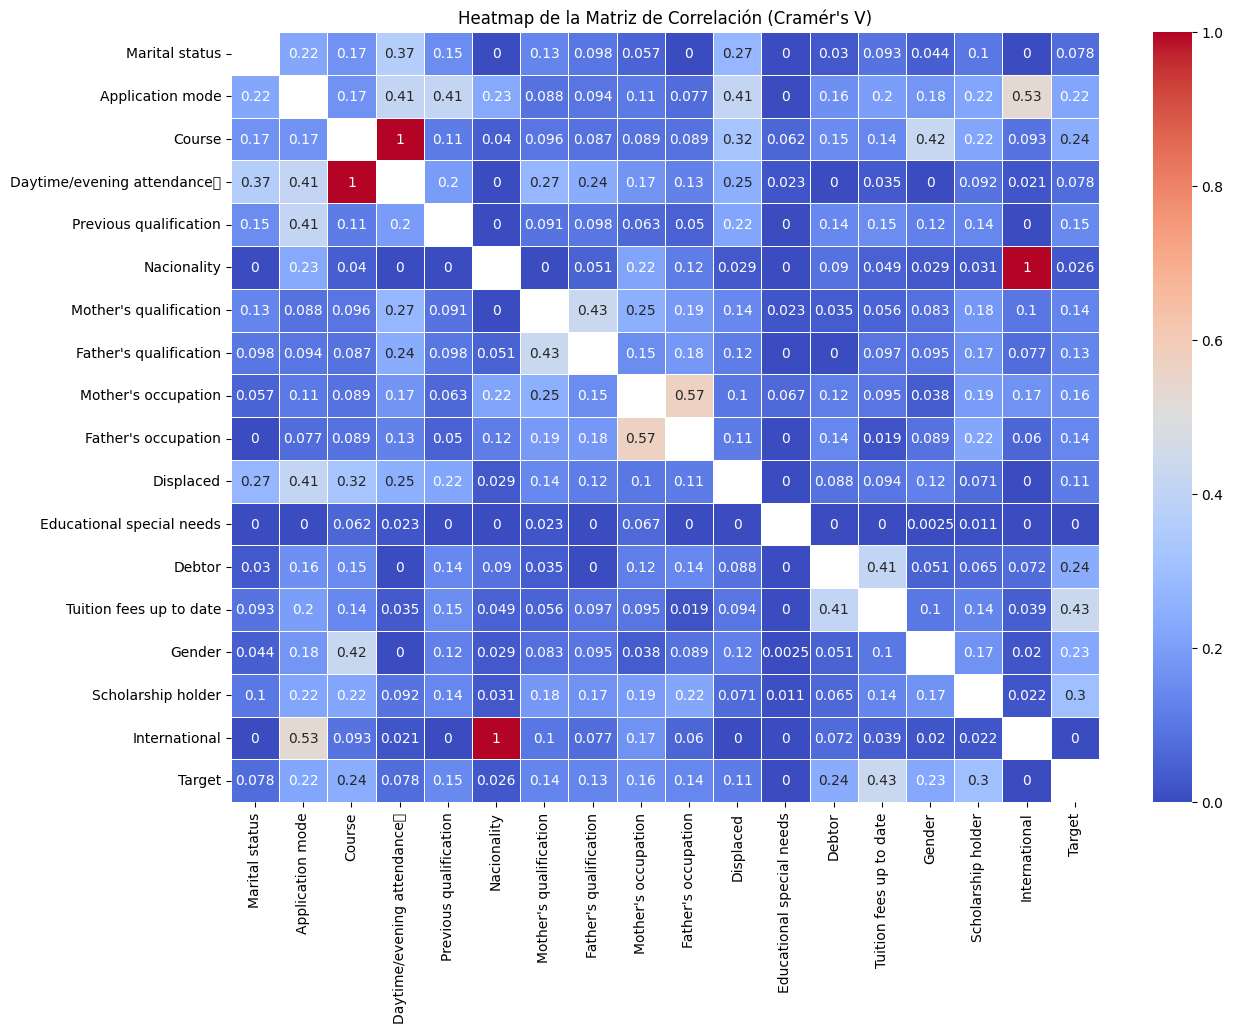

In [220]:
# Definir la función para calcular Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1))
    rcorr = r - ( (r - 1) ** 2 / (n - 1) )
    kcorr = k - ( (k - 1) ** 2 / (n - 1) )
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Función para calcular Cramér's V para todas las combinaciones
def cramers_v_for_combinations(df, categorical_columns):
    results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
    for col1, col2 in combinations(categorical_columns, 2):
        contingency_table = pd.crosstab(df[col1], df[col2])
        results.loc[col1, col2] = cramers_v(contingency_table.values)
        results.loc[col2, col1] = results.loc[col1, col2]  # La matriz es simétrica
    return results

# Lista de columnas categóricas
categorico_nominal

# Calcular Cramér's V para combinaciones
correlation_matrix = cramers_v_for_combinations(df, categorico_nominal)
df_correlation_matrix = pd.DataFrame(correlation_matrix)

# Visualizamos la matriz de correlación (Cramér's V) en un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(df_correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación (Cramér's V)")
plt.show()


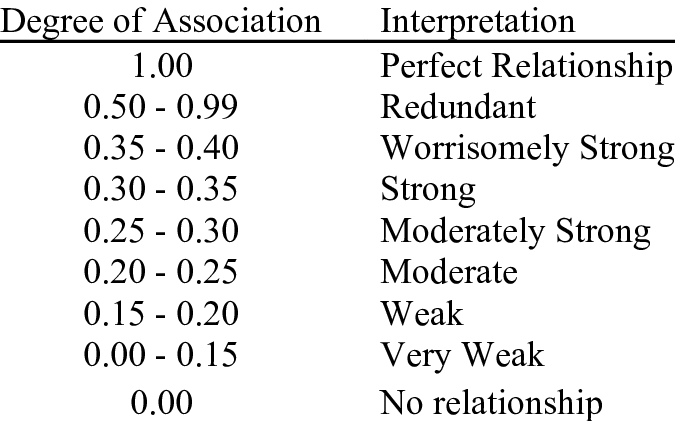

Nos quedaremos con aquellas columnas que tienen una relación moderada con la columna 'Target'.

In [221]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Marital status', 'Daytime/evening attendance\t', 'Previous qualification',
                      'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
                      'Displaced', 'Educational special needs', 'International']

# Eliminar las columnas del DataFrame original
df = df.drop(columns=columnas_a_eliminar)

# Eliminar las columnas de la matriz de correlación también
df_correlation_matrix = df_correlation_matrix.drop(columns=columnas_a_eliminar, index=columnas_a_eliminar)


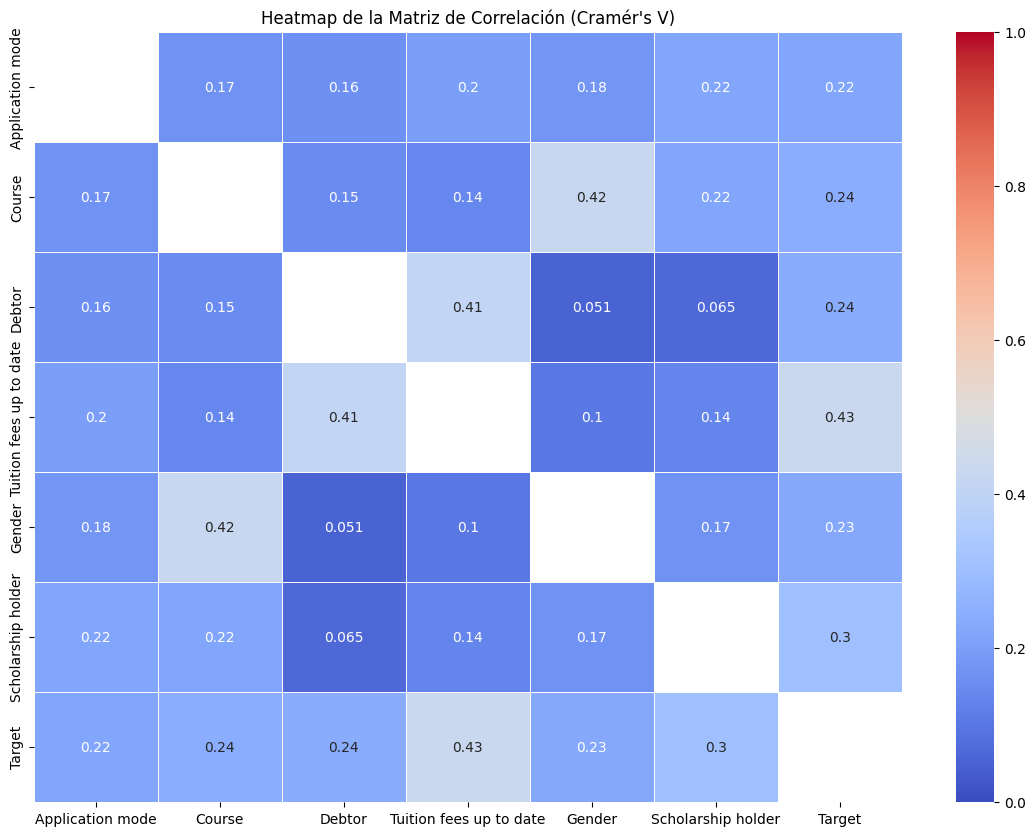

In [222]:
# Visualizamos la matriz de correlación (Cramér's V) en un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(df_correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación (Cramér's V)")
plt.show()

### 5.2 Correlación entre varibles de tipo categórico nominale y numérico:

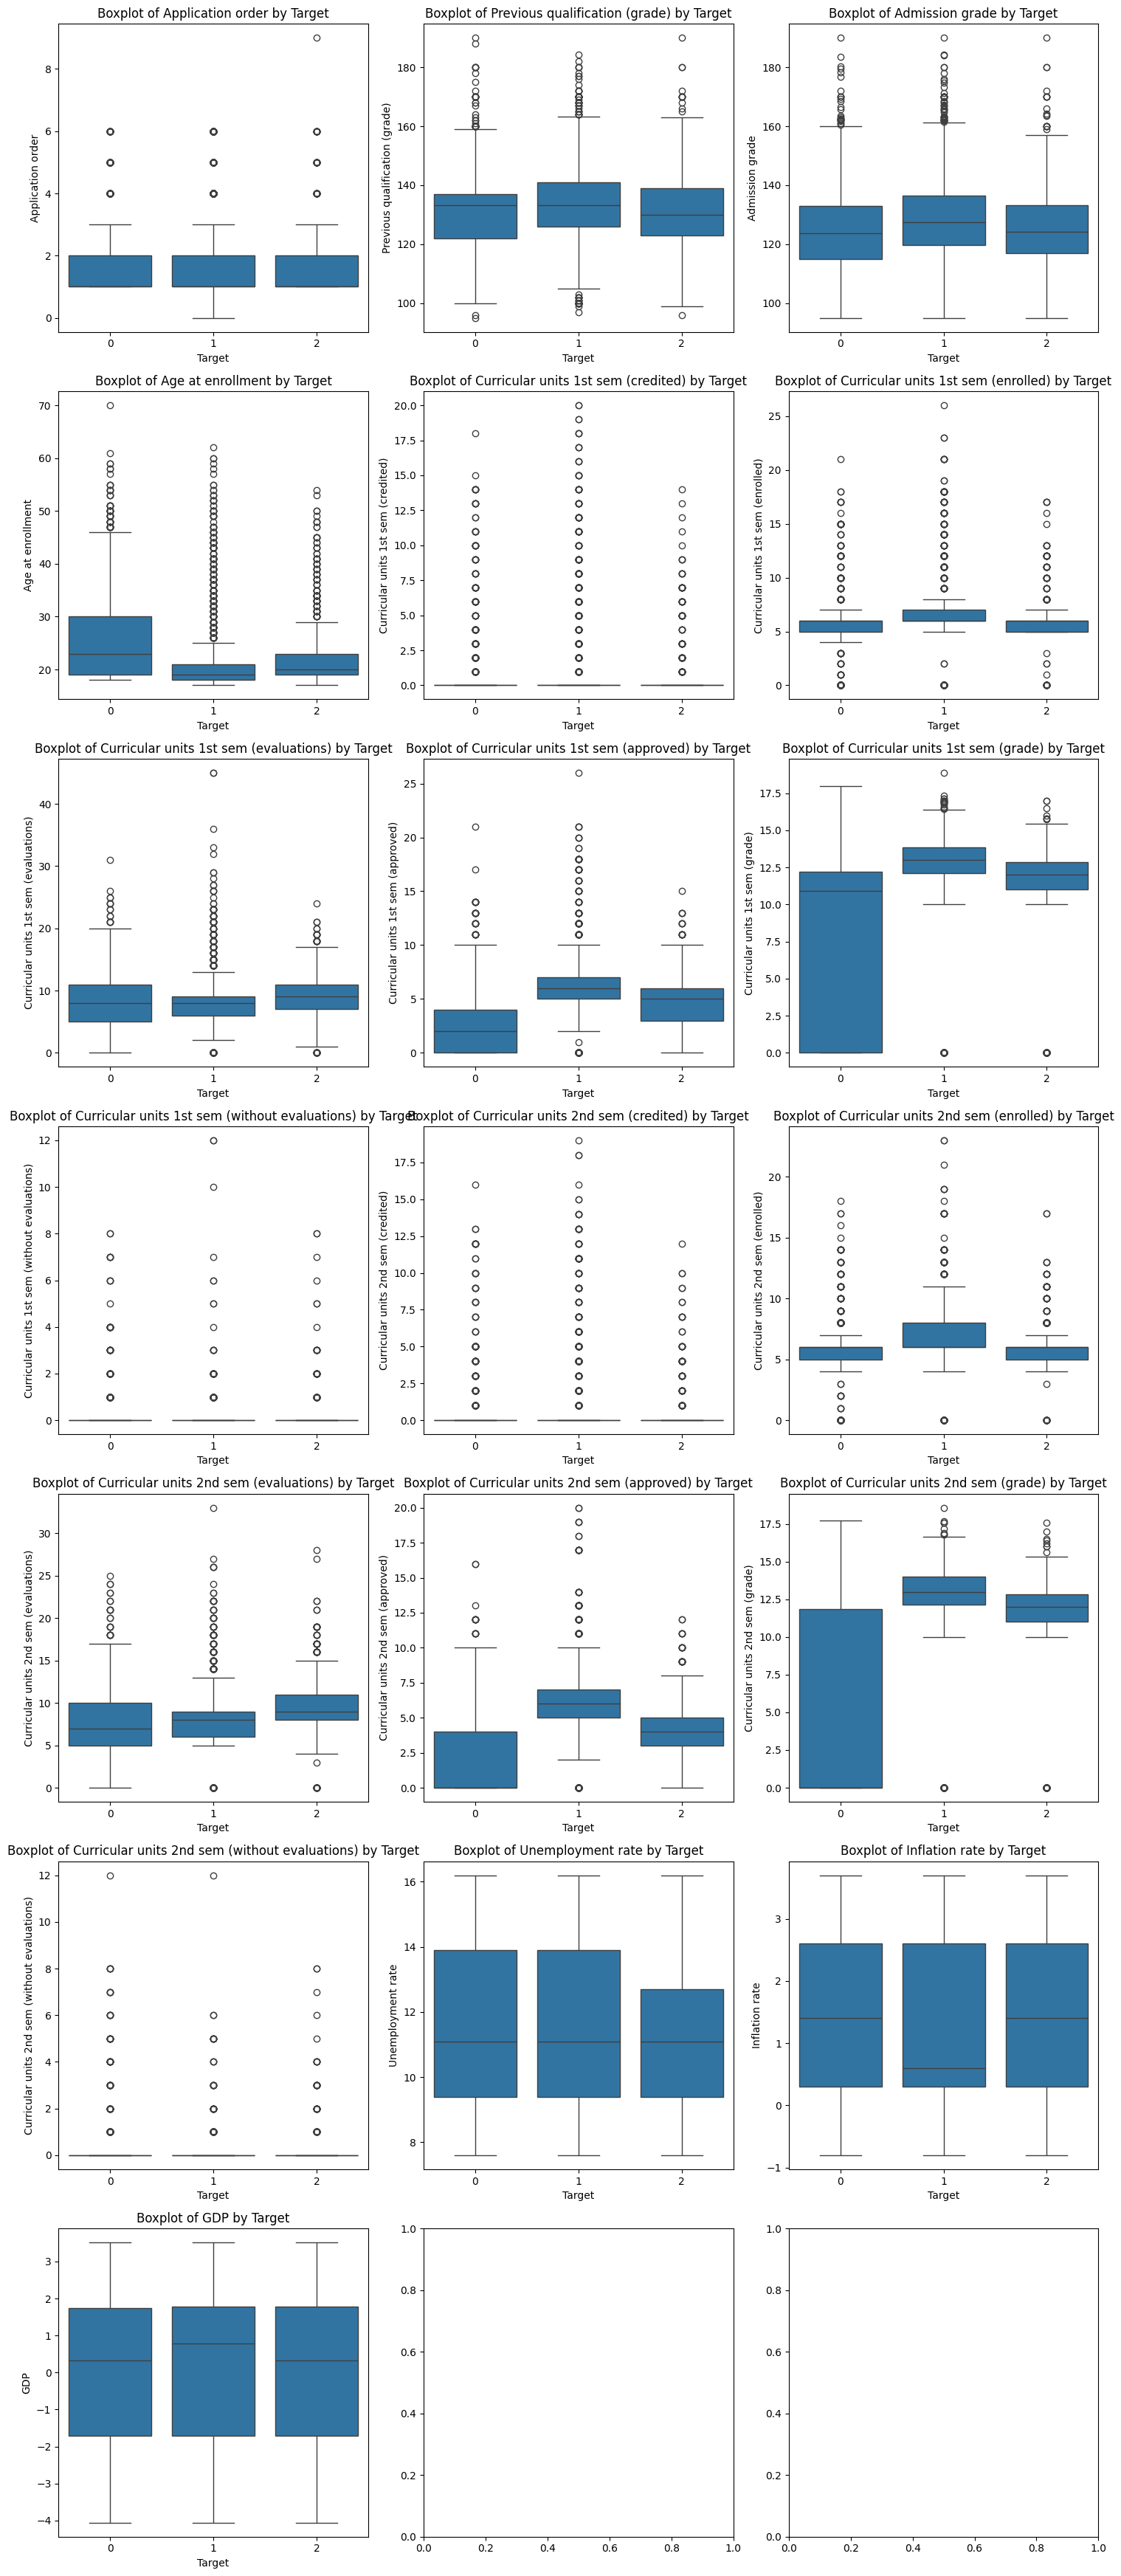

In [223]:
# Configuración de la figura
n_col = 3  # Número de columnas
n_row = (len(numerico) + n_col - 1) // n_col  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5 * n_row))

# Iterar sobre las columnas numéricas y crear boxplots
for i, num_col in enumerate(numerico):
    ax = axes[i // n_col, i % n_col]  # Obtener el eje correspondiente
    sns.boxplot(x='Target', y=num_col, data=df, ax=ax)
    ax.set_title(f'Boxplot of {num_col} by Target')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [224]:
# Normalización Min-Max
df_copia1 = df.copy()

for col in numerico:
    df_copia1[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Mostrar el DataFrame normalizado
df_copia1[numerico].head()


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.555556,0.284211,0.340000,0.056604,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.111111,0.684211,0.500000,0.037736,0.0,0.230769,0.133333,0.230769,0.741722,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.555556,0.284211,0.313684,0.037736,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.222222,0.284211,0.258947,0.056604,0.0,0.230769,0.177778,0.230769,0.711447,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.111111,0.052632,0.489474,0.528302,0.0,0.230769,0.200000,0.192308,0.653422,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687


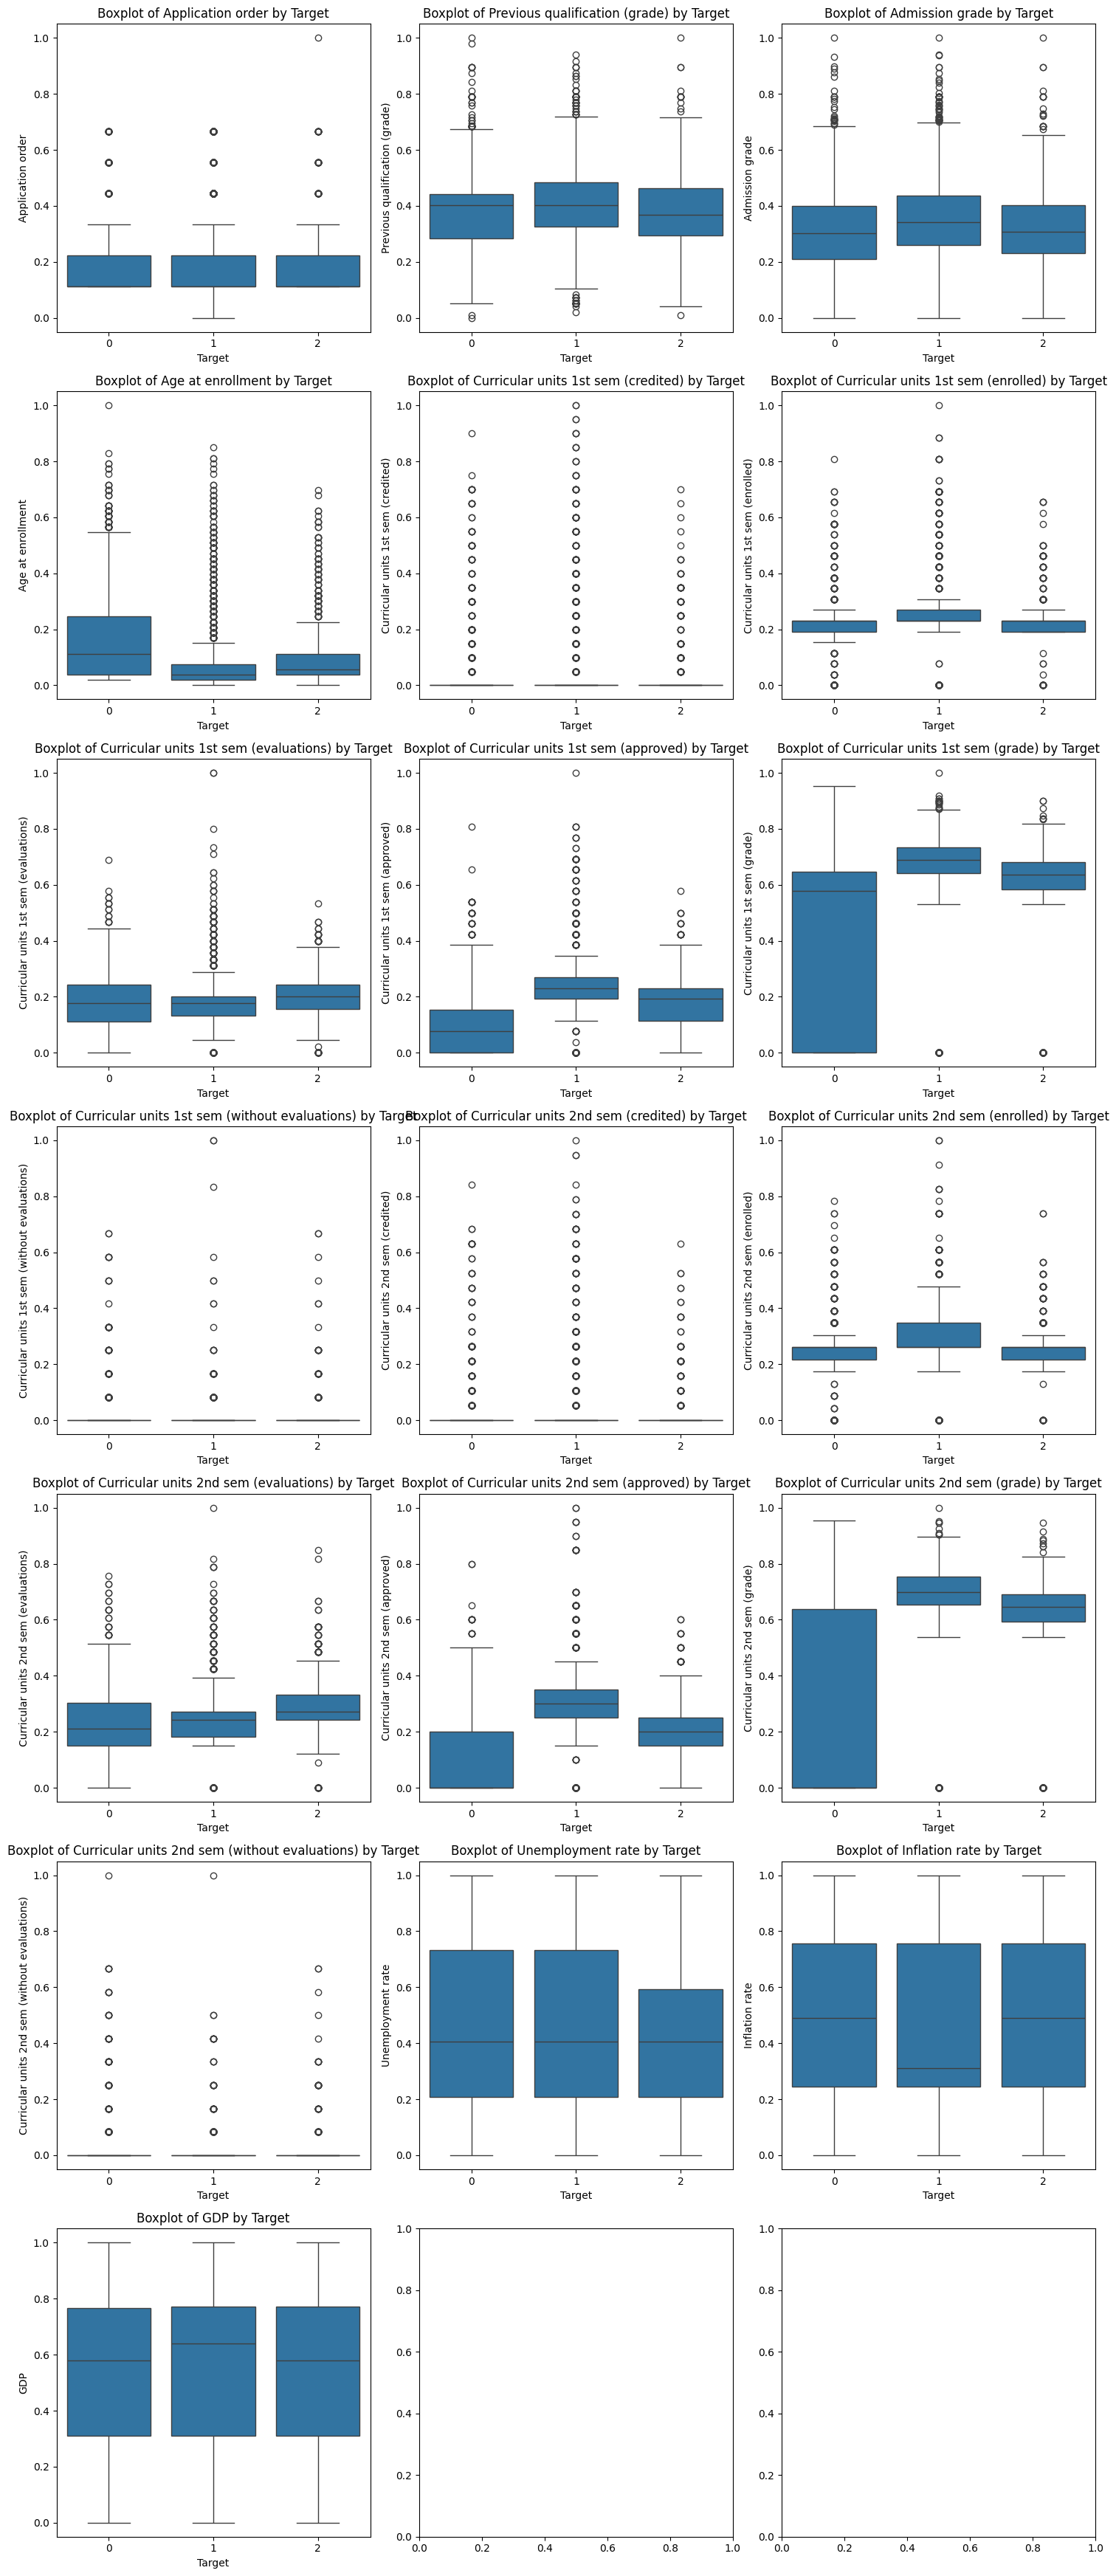

In [225]:
# Configuración de la figura
n_col = 3  # Número de columnas
n_row = (len(numerico) + n_col - 1) // n_col  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5 * n_row))

# Iterar sobre las columnas numéricas y crear boxplots
for i, num_col in enumerate(numerico):
    ax = axes[i // n_col, i % n_col]  # Obtener el eje correspondiente
    sns.boxplot(x='Target', y=num_col, data=df_copia1, ax=ax)
    ax.set_title(f'Boxplot of {num_col} by Target')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [230]:
# Aplicar transformación logarítmica (agregar 1 para evitar log(0))
df_copia2 = df.copy()

for col in numerico:
    df_copia2[col] = np.log1p(df[col])

df_copia2[numerico].head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.791759,4.812184,4.854371,3.044522,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,2.468100,0.875469,1.007958
1,0.693147,5.081404,4.966335,2.995732,0.0,1.94591,1.945910,1.945910,2.708050,0.0,0.0,1.94591,1.945910,1.945910,2.685577,0.0,2.701361,-0.356675,0.582216
2,1.791759,4.812184,4.834693,2.995732,0.0,1.94591,0.000000,0.000000,0.000000,0.0,0.0,1.94591,0.000000,0.000000,0.000000,0.0,2.468100,0.875469,1.007958
3,1.098612,4.812184,4.792479,3.044522,0.0,1.94591,2.197225,1.945910,2.669210,0.0,0.0,1.94591,2.397895,1.791759,2.595255,0.0,2.341806,-1.609438,NaN
4,0.693147,4.615121,4.959342,3.828641,0.0,1.94591,2.302585,1.791759,2.590267,0.0,0.0,1.94591,1.945910,1.945910,2.639057,0.0,2.701361,-0.356675,0.582216


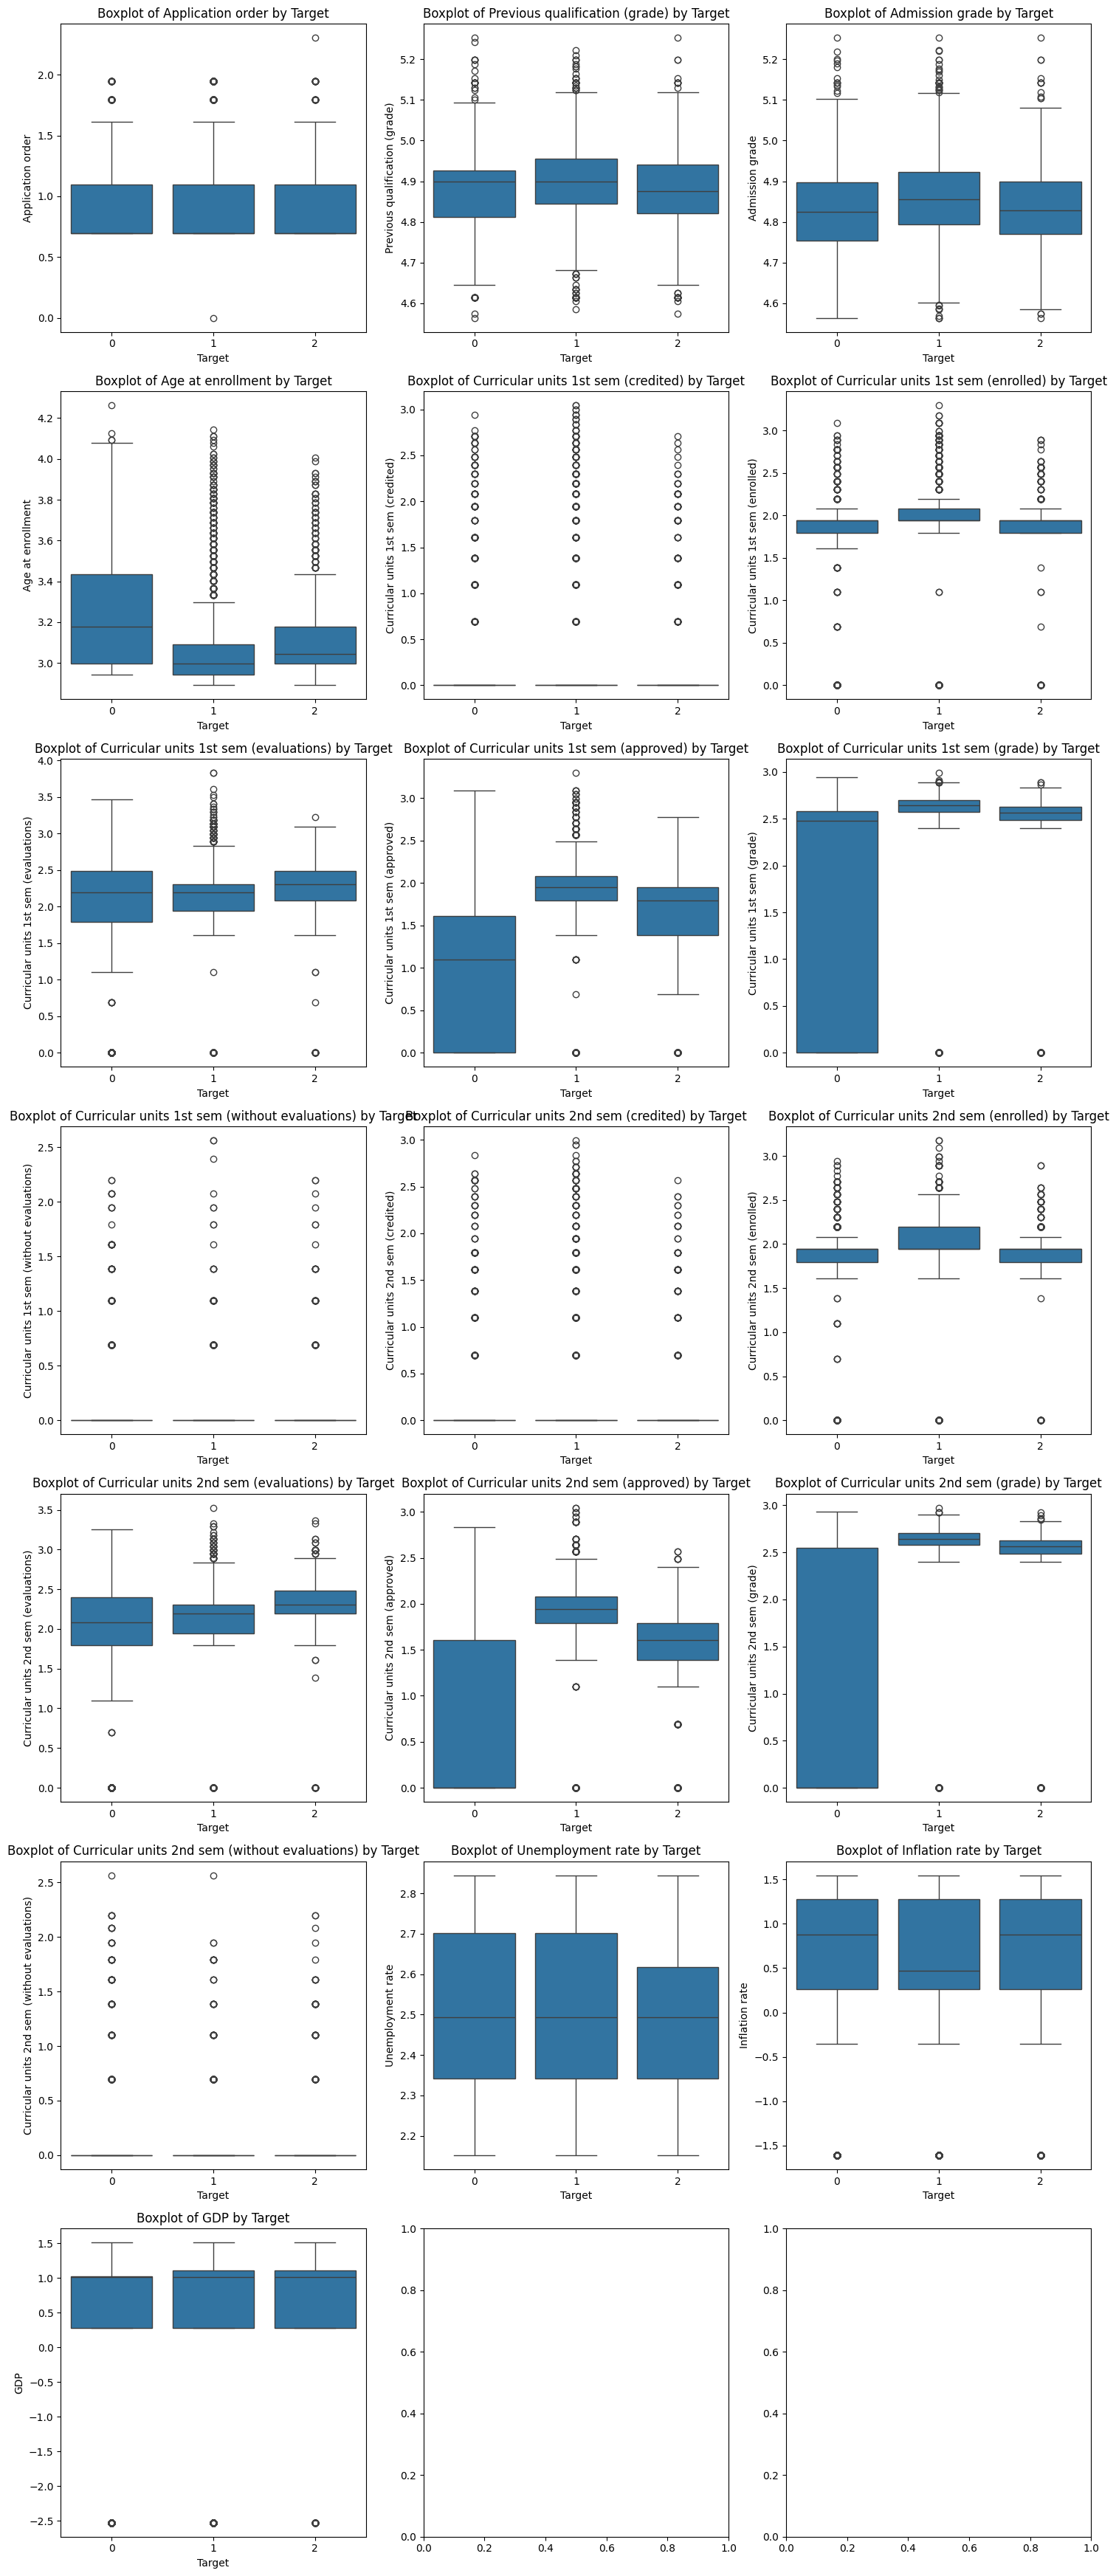

In [231]:
# Configuración de la figura
n_col = 3  # Número de columnas
n_row = (len(numerico) + n_col - 1) // n_col  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5 * n_row))

# Iterar sobre las columnas numéricas y crear boxplots
for i, num_col in enumerate(numerico):
    ax = axes[i // n_col, i % n_col]  # Obtener el eje correspondiente
    sns.boxplot(x='Target', y=num_col, data=df_copia2, ax=ax)
    ax.set_title(f'Boxplot of {num_col} by Target')

# Ajustar el layout
plt.tight_layout()
plt.show()

Como se puede observar, con los dos tipos de normalización para las columnas del tipo numérico no categórico nominal no existe mucho cambio. Por esta razón, no se realizará ninguna normalización y nos mantenemos con el marco de datos sin normalizar.

In [234]:
# Realizar la prueba de Kruskal-Wallis para encontrar asociación entre cada columna numérica y la columna de interés
for num_col in numerico:
    # Obtener los grupos correspondientes a cada nivel de 'Target'
    grupo_abandono = df[df['Target'] == 0][num_col] # Dropout
    grupo_matriculado = df[df['Target'] == 1][num_col] # Graduate
    grupo_graduado = df[df['Target'] == 2][num_col] # Enrolled

    # Realizar la prueba
    kruskal_result = kruskal(grupo_abandono, grupo_matriculado, grupo_graduado)

    # Imprimir el resultado
    print(f'Kruskal-Wallis para {num_col}: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}')


Kruskal-Wallis para Application order: H-statistic = 47.3036, p-value = 0.0000
Kruskal-Wallis para Previous qualification (grade): H-statistic = 63.6769, p-value = 0.0000
Kruskal-Wallis para Admission grade: H-statistic = 73.2347, p-value = 0.0000
Kruskal-Wallis para Age at enrollment: H-statistic = 375.1069, p-value = 0.0000
Kruskal-Wallis para Curricular units 1st sem (credited): H-statistic = 2.4080, p-value = 0.3000
Kruskal-Wallis para Curricular units 1st sem (enrolled): H-statistic = 246.6171, p-value = 0.0000
Kruskal-Wallis para Curricular units 1st sem (evaluations): H-statistic = 130.6588, p-value = 0.0000
Kruskal-Wallis para Curricular units 1st sem (approved): H-statistic = 1561.7395, p-value = 0.0000
Kruskal-Wallis para Curricular units 1st sem (grade): H-statistic = 1094.1865, p-value = 0.0000
Kruskal-Wallis para Curricular units 1st sem (without evaluations): H-statistic = 32.6066, p-value = 0.0000
Kruskal-Wallis para Curricular units 2nd sem (credited): H-statistic = 7.1

In [235]:
# Ahora aplicamos ANOVA

# Inicializar un diccionario para almacenar los resultados de ANOVA
anova_results = {}

# Realizar ANOVA para cada variable numérica
for col in numerico:
    # Extraer los datos para cada grupo
    grupo_abandono = df[df['Target'] == 0][col] # Dropout
    grupo_matriculado = df[df['Target'] == 1][col] # Graduate
    grupo_graduado = df[df['Target'] == 2][col] # Enrolled

    # Realizar ANOVA
    anova_result = f_oneway(grupo_abandono, grupo_matriculado, grupo_graduado)

    # Almacenar resultados
    anova_results[col] = {
        'F-statistic': anova_result.statistic,
        'p-value': anova_result.pvalue
    }

# Mostrar resultados
anova_results_df = pd.DataFrame(anova_results).T
print(anova_results_df)


                                                F-statistic        p-value
Application order                                 19.727174   2.955293e-09
Previous qualification (grade)                    27.728589   1.077783e-12
Admission grade                                   35.648604   4.380466e-16
Age at enrollment                                154.712071   1.138849e-65
Curricular units 1st sem (credited)                7.979355   3.474158e-04
Curricular units 1st sem (enrolled)               59.467391   3.272852e-26
Curricular units 1st sem (evaluations)            37.527840   6.897115e-17
Curricular units 1st sem (approved)              859.866768  3.649472e-316
Curricular units 1st sem (grade)                 713.517328  2.803052e-269
Curricular units 1st sem (without evaluations)    11.437319   1.110815e-05
Curricular units 2nd sem (credited)                9.974542   4.762728e-05
Curricular units 2nd sem (enrolled)               75.591910   5.244430e-33
Curricular units 2nd sem 

De este modo nos quedamos con las características que mejor se asocian con los valores de 'Target'.

In [236]:
# Seleccionamos las columnas a eliminar
columnas_a_eliminar1 = ['Curricular units 1st sem (credited)', 'Inflation rate']

In [237]:
# Eliminar las columnas del DataFrame original
df = df.drop(columns=columnas_a_eliminar1)

In [238]:
df

,Application mode,Application order,Course,Previous qualification (grade),Admission grade,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,GDP,Target
0,17,5,171,122.0,127.3,0,1,1,0,20,...,0,0,0,0,0,0.000000,0,10.8,1.74,0
1,15,1,9254,160.0,142.5,0,0,1,0,19,...,0,0,6,6,6,13.666667,0,13.9,0.79,1
2,1,5,9070,122.0,124.8,0,0,1,0,19,...,0,0,6,0,0,0.000000,0,10.8,1.74,0
3,17,2,9773,122.0,119.6,0,1,0,0,20,...,0,0,6,10,5,12.400000,0,9.4,-3.12,1
4,39,1,8014,100.0,141.5,0,1,0,0,45,...,0,0,6,6,6,13.000000,0,13.9,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,125.0,122.2,0,1,1,0,19,...,0,0,6,8,5,12.666667,0,15.5,-4.06,1
4420,1,2,9773,120.0,119.0,1,0,0,0,18,...,0,0,6,6,2,11.000000,0,11.1,2.02,0
4421,1,1,9500,154.0,149.5,0,1,0,1,30,...,0,0,8,9,1,13.500000,0,13.9,0.79,0
4422,1,1,9147,180.0,153.8,0,1,0,1,20,...,0,0,5,6,5,12.000000,0,9.4,-3.12,1
